In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.time_frequency import tfr_morlet, psd_multitaper
from mne.datasets import somato

In [3]:
data_path = somato.data_path()
raw_fname = data_path + '/MEG/somato/sef_raw_sss.fif'

# Setup for reading the raw data
raw = mne.io.read_raw_fif(raw_fname)
events = mne.find_events(raw, stim_channel='STI 014')

# picks MEG gradiometers
picks = mne.pick_types(raw.info, meg='grad', eeg=False, eog=True, stim=False)

# Construct Epochs
event_id, tmin, tmax = 1, -1., 3.
baseline = (None, 0)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=baseline, reject=dict(grad=4000e-13, eog=350e-6),
                    preload=True)

epochs.resample(150., npad='auto')  # resample to reduce computation time

Opening raw data file C:\Users\Elad Rapaport\mne_data\MNE-somato-data\MEG\somato\sef_raw_sss.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
Current compensation grade : 0
111 events found
Event IDs: [1]
111 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
3 bad epochs dropped


<Epochs  |   108 events (all good), -0.998976 - 2.99436 sec, baseline [None, 0], ~104.7 MB, data loaded,
 '1': 108>

    using multitaper spectrum estimation with 7 DPSS windows


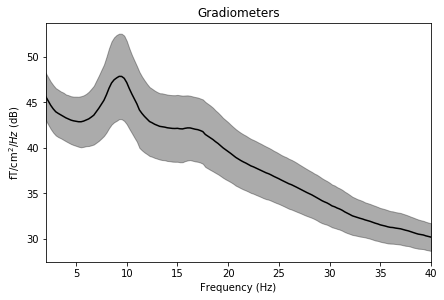

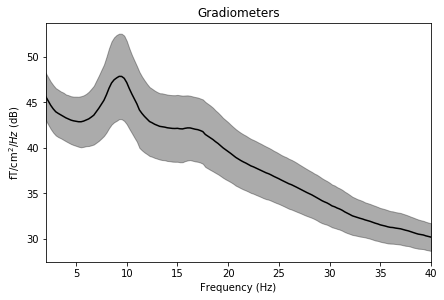

In [4]:
epochs.plot_psd(fmin=2., fmax=40.)

    using multitaper spectrum estimation with 7 DPSS windows


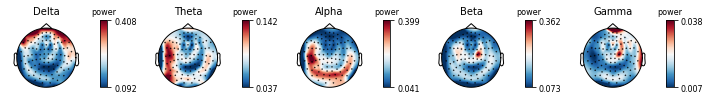

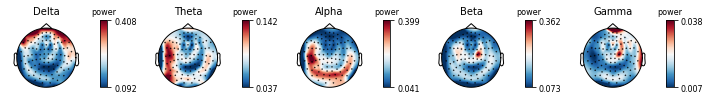

In [5]:
epochs.plot_psd_topomap(ch_type='grad', normalize=True)